In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [3]:
print(df.shape)
print(df.isna().sum())

(43400, 12)
id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


In [4]:
df.drop(columns=['smoking_status'],axis=1,inplace=True)
df.drop(columns=['id'],axis=1,inplace=True)

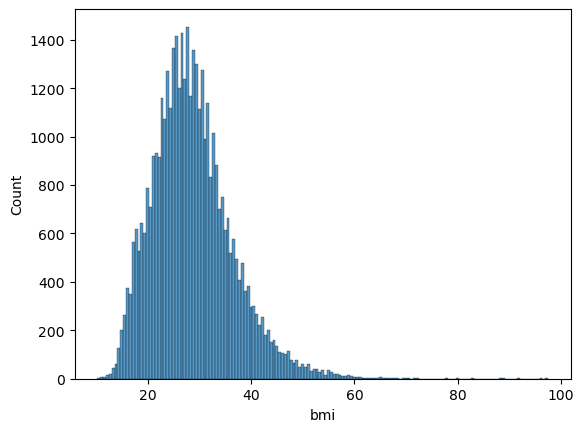

0.8987282500249906


In [5]:
sns.histplot(df['bmi'])
plt.show()
print(df['bmi'].skew())

In [6]:
#     Значення кофіцієнта асиметрії більше за 1 або менше за -1 вказує на дуже скошений розподіл.
#     Значення між 0,5 і 1 або між -0,5 і -1 вказує на помірну асиметрію.
#     Значення між -0,5 і 0,5 вказує на досить симетричний розподіл.

# Таким чином, якщо ви визначили, що розподіл df['bmi'] є помірно скошеним, то виправдано вказати, що ви не можете використовувати середнє значення для заповнення пропущених значень, 
# оскільки це може вплинути на точність аналізу. Замість цього ви можете використовувати медіану (яка є менш чутливою до викидів) 
# або моду (яка може використовуватися і для числових і категоріальних даних) для заповнення пропущених значень, залежно від природи даних і цілей аналізу.


df['bmi'].fillna(df['bmi'].median(),inplace=True)
print(df['bmi'].isna().sum())

0


In [7]:
#Визначимо наявність викидів
print(df.describe())

                age  hypertension  heart_disease  avg_glucose_level   
count  43400.000000  43400.000000   43400.000000       43400.000000  \
mean      42.217894      0.093571       0.047512         104.482750   
std       22.519649      0.291235       0.212733          43.111751   
min        0.080000      0.000000       0.000000          55.000000   
25%       24.000000      0.000000       0.000000          77.540000   
50%       44.000000      0.000000       0.000000          91.580000   
75%       60.000000      0.000000       0.000000         112.070000   
max       82.000000      1.000000       1.000000         291.050000   

                bmi        stroke  
count  43400.000000  43400.000000  
mean      28.574551      0.018041  
std        7.639769      0.133103  
min       10.100000      0.000000  
25%       23.400000      0.000000  
50%       27.700000      0.000000  
75%       32.600000      0.000000  
max       97.600000      1.000000  


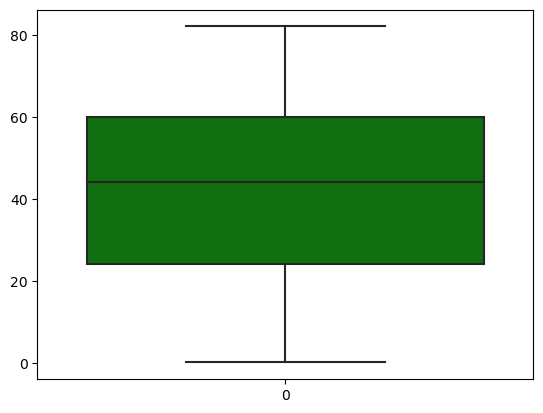

In [8]:
sns.boxplot(df['age'],color='green')
plt.show()


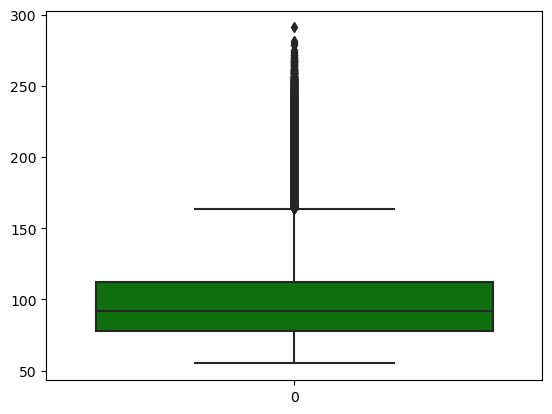

In [9]:
sns.boxplot(df['avg_glucose_level'],color='green')
plt.show()


In [10]:
q1=df['avg_glucose_level'].quantile(0.25)
q3=df['avg_glucose_level'].quantile(0.75)
iqr=q3-q1
lower=q1-3*iqr
upper=q3+3*iqr

print(q1," ",iqr)

# no of extreemmmme outliers
print(df[(df['avg_glucose_level']<lower) | (df['avg_glucose_level']>upper)].shape)
print("before removing Outliers",df.shape)

# removing extremmme outliers
df=df[(df['avg_glucose_level']>=lower) & (df['avg_glucose_level']<=upper)]
print("after removing Outliers",df.shape)

# removing mild + extremmme outliers
new_df=df[(df['avg_glucose_level']>=q1-1.5*iqr) & (df['avg_glucose_level']<=q1+1.5*iqr)]

77.54   34.52999999999999
(1865, 10)
before removing Outliers (43400, 10)
after removing Outliers (41535, 10)


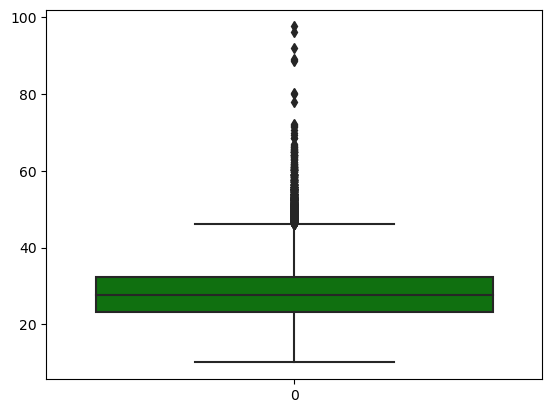

In [11]:
sns.boxplot(df['bmi'],color='green')
plt.show()

In [12]:
q1=df['bmi'].quantile(0.25)
q3=df['bmi'].quantile(0.75)
iqr=q3-q1
lower=q1-3*iqr
upper=q3+3*iqr

print(q1," ",iqr)

# no of extreemmmme outliers
print(df[(df['bmi']<lower) | (df['bmi']>upper)].shape)

df=df[(df['bmi']>=lower)&(df['bmi']<=upper)]

# removing mild + extremmme outliers
new_df=new_df[(new_df['bmi']>=q1-1.5*iqr) & (new_df['bmi']<=q1+1.5*iqr)]

23.2   9.2
(82, 10)


In [13]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke'],
      dtype='object')

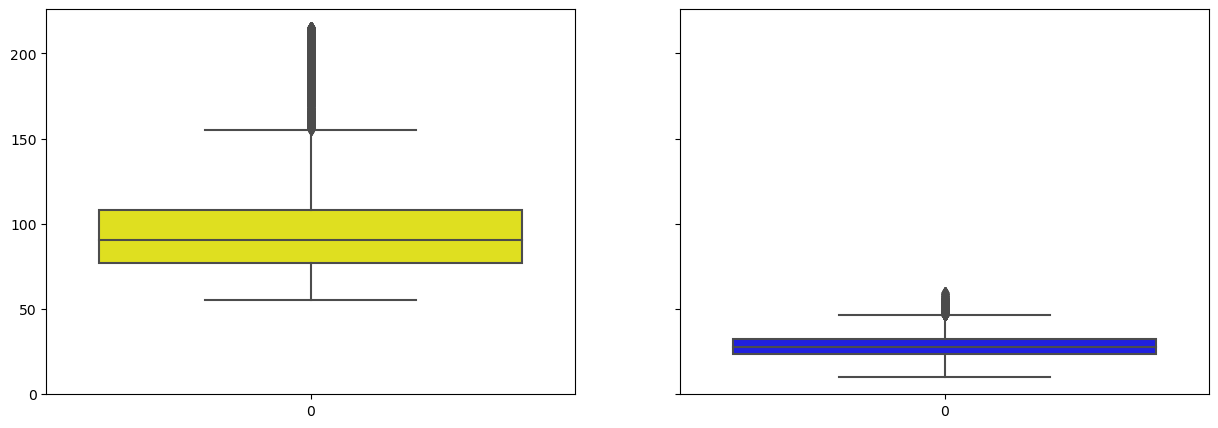

In [14]:
fig,ax=plt.subplots(1,2,figsize=(15,5),sharey=True)
sns.boxplot(df['avg_glucose_level'],color='yellow',ax=ax[0])
sns.boxplot(df['bmi'],color='blue',ax=ax[1])
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_encoded_df = df.copy()

print(label_encoded_df.select_dtypes(include='O').columns)

for col in label_encoded_df.select_dtypes(include='O').columns:
    label_encoded_df[col]=le.fit_transform(label_encoded_df[col])
label_encoded_df.head()

Index(['gender', 'ever_married', 'work_type', 'Residence_type'], dtype='object')


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,1,3.0,0,0,0,4,0,95.12,18.0,0
1,1,58.0,1,0,1,2,1,87.96,39.2,0
2,0,8.0,0,0,0,2,1,110.89,17.6,0
3,0,70.0,0,0,1,2,0,69.04,35.9,0
4,1,14.0,0,0,0,1,0,161.28,19.1,0


In [16]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,0


In [17]:
df["work_type"].unique()

array(['children', 'Private', 'Never_worked', 'Self-employed', 'Govt_job'],
      dtype=object)

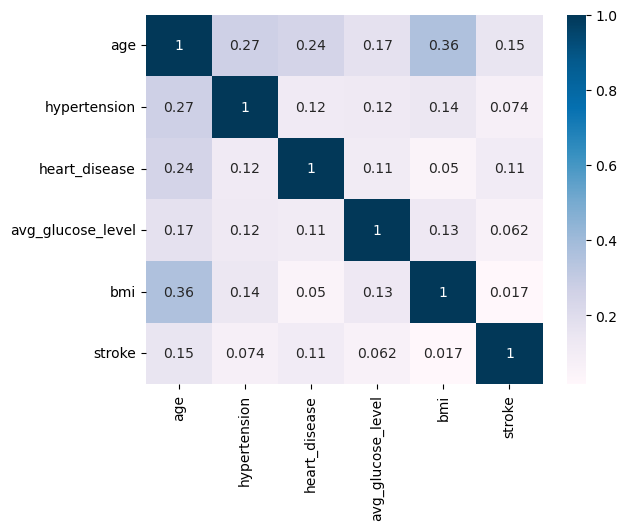

In [18]:
## but still showing how we make correlation matrix (although not a right approach)
import seaborn as sns
import matplotlib.pyplot as plt
correlation= df.corr(numeric_only=True)
sns.heatmap(correlation,annot=True,cmap='PuBu',fmt=".2g",)
plt.show()

In [19]:
print(len(df.columns))
print(df.columns)
print(df.head())

10
Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke'],
      dtype='object')
   gender   age  hypertension  heart_disease ever_married     work_type   
0    Male   3.0             0              0           No      children  \
1    Male  58.0             1              0          Yes       Private   
2  Female   8.0             0              0           No       Private   
3  Female  70.0             0              0          Yes       Private   
4    Male  14.0             0              0           No  Never_worked   

  Residence_type  avg_glucose_level   bmi  stroke  
0          Rural              95.12  18.0       0  
1          Urban              87.96  39.2       0  
2          Urban             110.89  17.6       0  
3          Rural              69.04  35.9       0  
4          Rural             161.28  19.1       0  


In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X = label_encoded_df.iloc[:, :-1]  # Вибираємо всі стовпці, крім останнього (цільової змінної)
y = label_encoded_df.iloc[:, -1]   # Останній стовпець (цільова змінна)

# # apply SelectKBest class to extract top 9 best features
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
cols=pd.DataFrame(X.columns[fit.get_support()])
pval=pd.DataFrame(np.round(fit.pvalues_,3))
k=pd.concat([dfscores,cols,pval],axis=1)
k.columns=['Fscore','features','p_values']
print(k)
# print(k.sort_values(by='Fscore',ascending=False))
dfscores = pd.DataFrame
print(X.columns[fit.get_support()])
print(type(fit))
# print(fit.pvalues_)

# 0.05  0.10

         Fscore           features  p_values
0      2.302022             gender     0.129
1  11838.481255                age     0.000
2    209.784008       hypertension     0.000
3    438.130999      heart_disease     0.000
4     76.354606       ever_married     0.000
5      2.115939          work_type     0.146
6      0.358405     Residence_type     0.549
7   1925.323420  avg_glucose_level     0.000
8     21.761776                bmi     0.000
Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi'],
      dtype='object')
<class 'sklearn.feature_selection._univariate_selection.SelectKBest'>


In [21]:
df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,0


In [22]:
from sklearn.model_selection import train_test_split ,KFold, StratifiedKFold

ss=StratifiedKFold()

for train_index, test_index in ss.split(X,y):
    x_train=X.iloc[train_index]
    y_train=y.iloc[train_index]
    x_test=X.iloc[test_index]
    y_test=y.iloc[test_index]

    
print(x_train.head())

   gender   age  hypertension  heart_disease  ever_married  work_type   
0       1   3.0             0              0             0          4  \
1       1  58.0             1              0             1          2   
2       0   8.0             0              0             0          2   
3       0  70.0             0              0             1          2   
4       1  14.0             0              0             0          1   

   Residence_type  avg_glucose_level   bmi  
0               0              95.12  18.0  
1               1              87.96  39.2  
2               1             110.89  17.6  
3               0              69.04  35.9  
4               0             161.28  19.1  


In [23]:
from imblearn.combine import SMOTETomek

sm=SMOTETomek(random_state=42)
x_res,y_res=sm.fit_resample(x_train,y_train)

print(x_train.shape)
print(x_res.shape)

(33163, 9)
(65100, 9)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


classifiers={'Logistic regression':LogisticRegression(),
             'KNearest':KNeighborsClassifier(),
            }

In [25]:
from sklearn.model_selection import cross_val_score

for key , clf in classifiers.items():
    clf.fit(x_res,y_res)
    training_score=cross_val_score(clf,x_res,y_res,cv=5)
    print("Classifiers: ", clf, " Has a training score of",
          round(training_score.mean(), 2) * 100, "% accuracy score")

D:\Programs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Programs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Classifiers:  LogisticRegression()  Has a training score of 79.0 % accuracy score
Classifiers:  KNeighborsClassifier()  Has a training score of 93.0 % accuracy score


In [26]:
from sklearn.model_selection import GridSearchCV

log_reg_param ={ 'penalty':['l2'],'C':[0.001,0.01,0.1,1,10,100,1000]}
grid_log_reg=GridSearchCV(LogisticRegression(),log_reg_param)

grid_log_reg.fit(x_res,y_res)

log_bp=grid_log_reg.best_estimator_

k_near_param={'n_neighbors':list(range(2,5,1)),'algorithm':['auto','ball_tree','kd_tree','brute']}
grid_k=GridSearchCV(KNeighborsClassifier(),k_near_param)

grid_k.fit(x_res,y_res)

k_bp=grid_k.best_estimator_


D:\Programs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Programs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [27]:
log_reg_score=cross_val_score(log_bp,x_res,y_res,cv=5)
print('Score for Logistic Regression param ',round(log_reg_score.mean() * 100, 2).astype(str) + '%')

k_score=cross_val_score(k_bp,x_res,y_res,cv=5) 

print('Score for KNeighbors param ',round(k_score.mean() * 100, 2).astype(str) + '%')


D:\Programs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Programs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Score for Logistic Regression param  79.37%
Score for KNeighbors param  95.61%


In [28]:
import joblib

# Зберегти модель у файл
# joblib.dump(log_bp, 'logistic_regression_model.pkl')
joblib.dump(k_bp, 'k_bp_model.pkl')


['k_bp_model.pkl']